In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Tabulation

In [2]:
url='https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7eff75d93110>)

In [5]:
df=pd.read_json('data.json')

In [6]:
import json

In [7]:
with open('data.json') as f:
    data=json.load(f)
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dateymd': '2020-03-14',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dateymd': '2020-03-14',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml':

In [8]:
data=data['states_daily']

In [9]:
df=pd.json_normalize(data)

In [10]:
df.date=pd.to_datetime(df.date)

In [11]:
df=df[df.status=='Confirmed']

In [12]:
df.head(5)

an ap ar as br ch ct       date  ... tg tn tr  tt un  up ut wb
0   0  1  0  0  0  0  0 2020-03-14  ...  1  1  0  81  0  12  0  0
3   0  0  0  0  0  0  0 2020-03-15  ...  2  0  0  27  0   1  0  0
6   0  0  0  0  0  0  0 2020-03-16  ...  1  0  0  15  0   0  1  0
9   0  0  0  0  0  0  0 2020-03-17  ...  1  0  0  11  0   2  0  1
12  0  0  0  0  0  0  0 2020-03-18  ...  8  1  0  37  0   2  1  0

[5 rows x 42 columns]

In [13]:
df.drop('status',axis=1,inplace=True)

In [14]:
df.set_index('date',inplace=True)

In [15]:
df

an    ap ar   as    br   ch  ...  tr      tt un    up    ut    wb
date                                     ...                                 
2020-03-14   0     1  0    0     0    0  ...   0      81  0    12     0     0
2020-03-15   0     0  0    0     0    0  ...   0      27  0     1     0     0
2020-03-16   0     0  0    0     0    0  ...   0      15  0     0     1     0
2020-03-17   0     0  0    0     0    0  ...   0      11  0     2     0     1
2020-03-18   0     0  0    0     0    0  ...   0      37  0     2     1     0
...         ..   ... ..  ...   ...  ...  ...  ..     ... ..   ...   ...   ...
2021-04-03  14  1398  3   68   836  310  ...   2   92994  0  3187   439  1736
2021-04-04  11  1730  0   69   864  341  ...  14  103794  0  4136   550  1957
2021-04-05   7  1326  2   70   935  285  ...   3   96563  0  3974   547  1961
2021-04-06   7  1941  2   92  1080  319  ...  14  115312  0  5895   791  2058
2021-04-07   8  2331  8  195  1527  399  ...  21  126265  0  6002  1109  2390

[390 rows x 40 columns]

In [16]:
df.drop('dateymd',axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2020-03-14 to 2021-04-07
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      390 non-null    object
 1   ap      390 non-null    object
 2   ar      390 non-null    object
 3   as      390 non-null    object
 4   br      390 non-null    object
 5   ch      390 non-null    object
 6   ct      390 non-null    object
 7   dd      390 non-null    object
 8   dl      390 non-null    object
 9   dn      390 non-null    object
 10  ga      390 non-null    object
 11  gj      390 non-null    object
 12  hp      390 non-null    object
 13  hr      390 non-null    object
 14  jh      390 non-null    object
 15  jk      390 non-null    object
 16  ka      390 non-null    object
 17  kl      390 non-null    object
 18  la      390 non-null    object
 19  ld      390 non-null    object
 20  mh      390 non-null    object
 21  ml      390 non-null    object
 22  mn     

In [18]:
df=df.apply(pd.to_numeric)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2020-03-14 to 2021-04-07
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      390 non-null    int64
 1   ap      390 non-null    int64
 2   ar      390 non-null    int64
 3   as      390 non-null    int64
 4   br      390 non-null    int64
 5   ch      390 non-null    int64
 6   ct      390 non-null    int64
 7   dd      390 non-null    int64
 8   dl      390 non-null    int64
 9   dn      390 non-null    int64
 10  ga      390 non-null    int64
 11  gj      390 non-null    int64
 12  hp      390 non-null    int64
 13  hr      390 non-null    int64
 14  jh      390 non-null    int64
 15  jk      390 non-null    int64
 16  ka      390 non-null    int64
 17  kl      390 non-null    int64
 18  la      390 non-null    int64
 19  ld      390 non-null    int64
 20  mh      390 non-null    int64
 21  ml      390 non-null    int64
 22  mn      390 non-null    int64
 

#styling tabulation

In [20]:
df=df.tail(7)

In [21]:
df.style

In [22]:
def colour_red_negative(x):
    color='red' if x <0 else 'white'
    return 'color: ' +color
df.style.applymap(colour_red_negative)

In [23]:
df.drop('un',axis=1,inplace=True)

In [24]:
df.style

In [25]:
df.style.highlight_max(color='red')

In [26]:
df.drop('dd',axis=1,inplace=True)

In [27]:
df.style.highlight_max(color='red').highlight_min(color='green')

In [34]:
df.drop('tt',axis=1,inplace=True)

In [37]:
def bold_max_value(x):
    is_max=(x==x.max())
    return ['font-weight :bold' if y else '' for y in is_max]

In [38]:
df.style.apply(bold_max_value)

In [39]:
df.style.apply(bold_max_value).highlight_min(color='green')

In [41]:
df.style.apply(bold_max_value).highlight_max(color='red',axis=1)

In [42]:
df.style.background_gradient(cmap='Reds')

In [43]:
df.style.background_gradient(cmap='Reds',axis=1)

In [44]:
df.style.background_gradient(cmap='Reds',subset=['mh','tn','dl'])

In [45]:
df.style.bar()

In [46]:
df.style.bar(subset=['mh','tn','dl'])

In [47]:
df[['mh','tn','dl']].style.bar()

In [48]:
df[['mh','tn','dl']].style.bar(subset=['mh'],color='red').bar(subset=['tn'],color='orange').bar(subset=['dl'],color='yellow')

#distribution of data

##continuous data

###histogram

In [51]:
x=np.random.normal(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


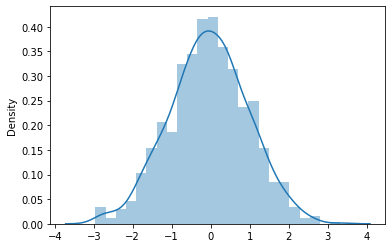

In [52]:
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


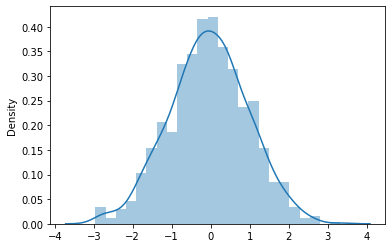

In [53]:
sns.distplot(x);

In [54]:
sns.set(color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


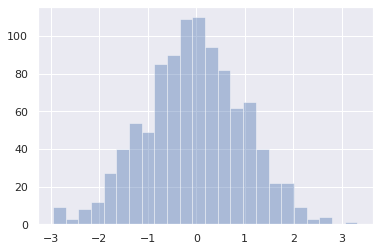

In [55]:
sns.distplot(x,kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


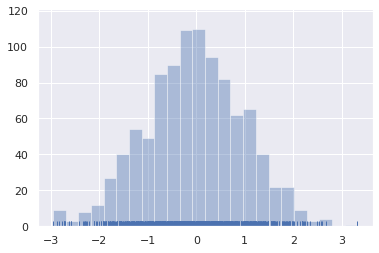

In [56]:
sns.distplot(x,kde=False,rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


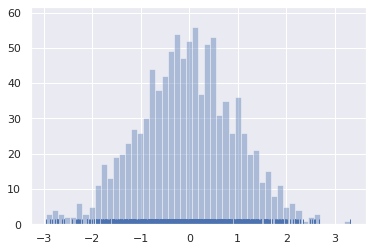

In [57]:
sns.distplot(x,kde=False,rug=True,bins=50);

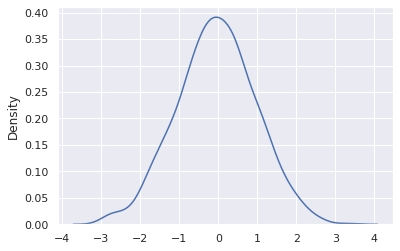

In [58]:
sns.kdeplot(x);

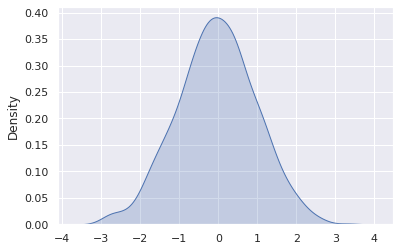

In [59]:
sns.kdeplot(x,shade=True);

In [60]:
y=np.random.uniform(size=1000)

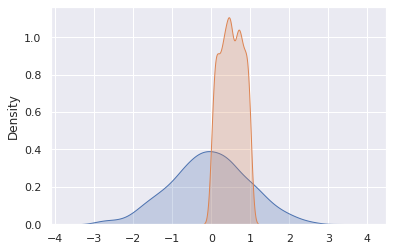

In [61]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [3]:
d=sns.load_dataset('diamonds')
d

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [63]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


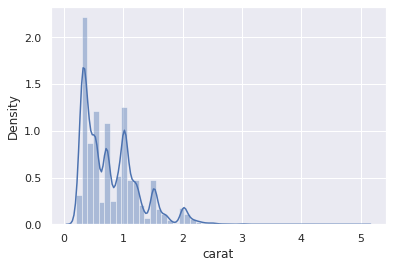

In [64]:
sns.distplot(d.carat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


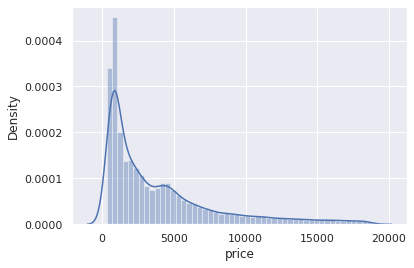

In [65]:
sns.distplot(d.price);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


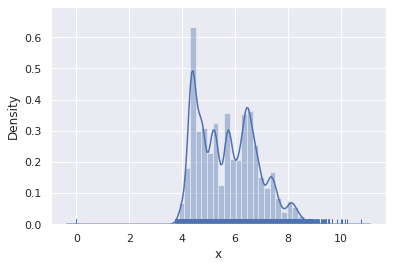

In [66]:
sns.distplot(d.x,rug=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


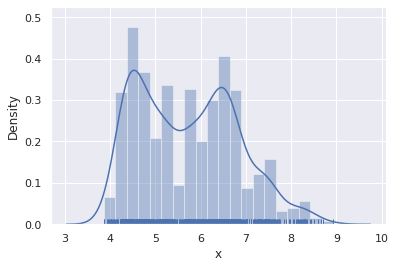

In [67]:
sns.distplot(d.sample(1000).x,rug=True,bins=20);

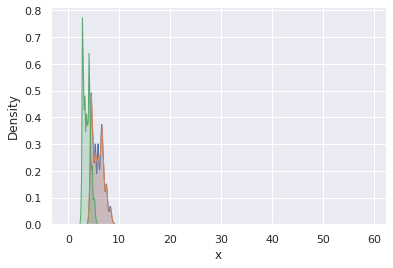

In [68]:
sns.kdeplot(d.x,shade=True)
sns.kdeplot(d.y,shade=True)
sns.kdeplot(d.z,shade=True);

###box plot

In [69]:
x=np.random.normal(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


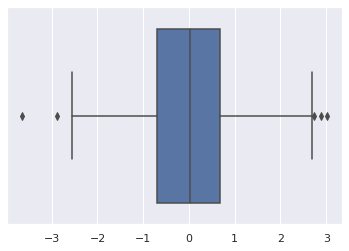

In [70]:
sns.boxplot(x);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


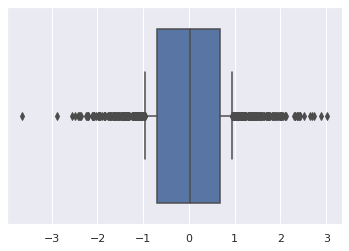

In [71]:
sns.boxplot(x,whis=0.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


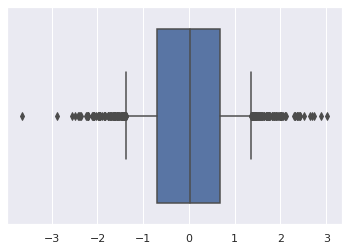

In [72]:
sns.boxplot(x,whis=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


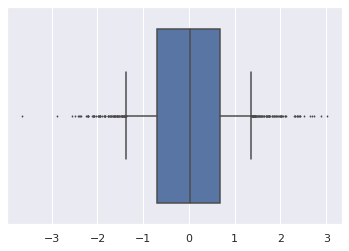

In [73]:
sns.boxplot(x,whis=0.5,fliersize=1);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


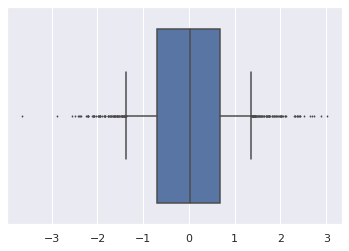

In [75]:
sns.boxplot(x,whis=0.5,fliersize=1,orient='v');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


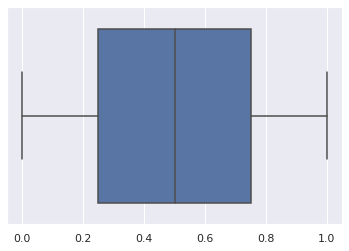

In [76]:
x=np.random.uniform(size=1000)
sns.boxplot(x);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


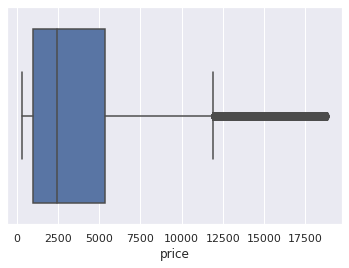

In [77]:
sns.boxplot(d.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


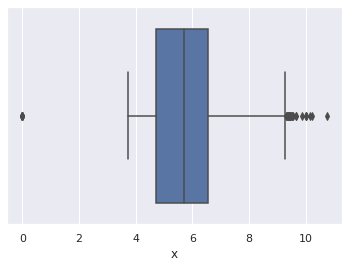

In [78]:
sns.boxplot(d.x);

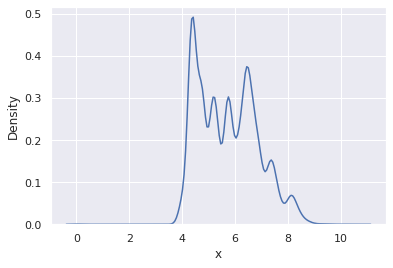

In [79]:
sns.kdeplot(d.x);

###boxen plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


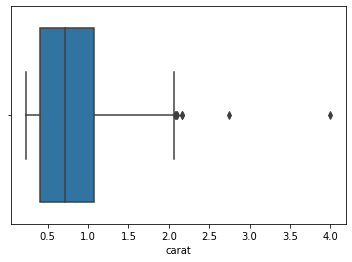

In [12]:
sns.boxplot(d.sample(500).carat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


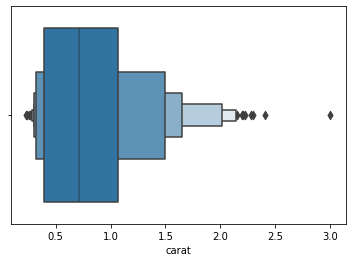

In [13]:
sns.boxenplot(d.sample(500).carat)

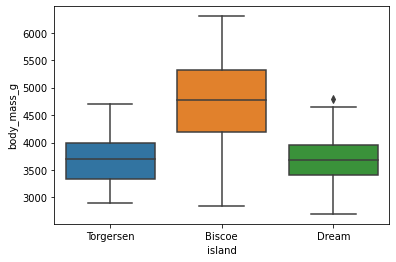

In [14]:
sns.boxplot(x='island',y='body_mass_g',data=p);

##distribution of categorical value

###bar plot

In [80]:
d.groupby('cut').count()

carat  color  clarity  depth  table  price      x      y      z
cut                                                                       
Ideal      21551  21551    21551  21551  21551  21551  21551  21551  21551
Premium    13791  13791    13791  13791  13791  13791  13791  13791  13791
Very Good  12082  12082    12082  12082  12082  12082  12082  12082  12082
Good        4906   4906     4906   4906   4906   4906   4906   4906   4906
Fair        1610   1610     1610   1610   1610   1610   1610   1610   1610

In [81]:
c=d.groupby('cut')['cut'].count()

In [82]:
c

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

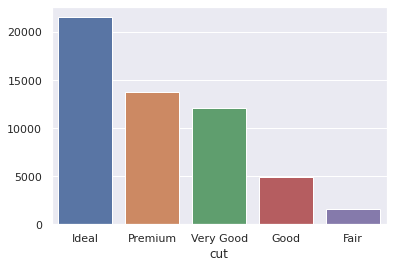

In [83]:
sns.barplot(x=c.index,y=c.values);

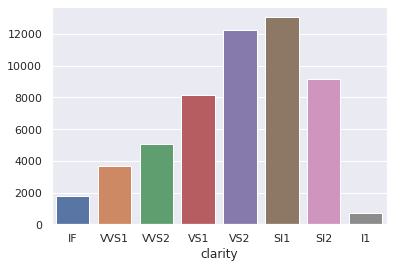

In [84]:
c=d.groupby('clarity')['clarity'].count()
sns.barplot(x=c.index,y=c.values)

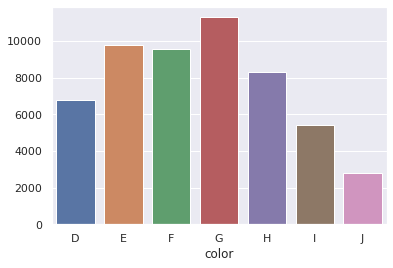

In [85]:
c=d.groupby('color')['color'].count()
sns.barplot(x=c.index,y=c.values);

###joint plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


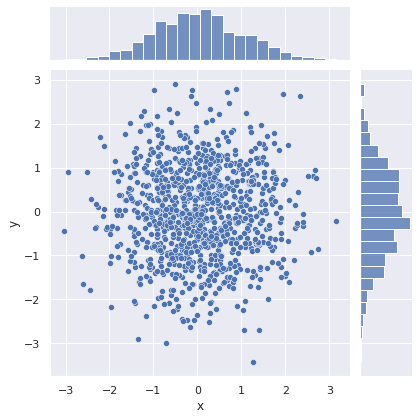

In [86]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)
df=pd.DataFrame({'x':x,'y':y})
sns.jointplot('x','y',data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


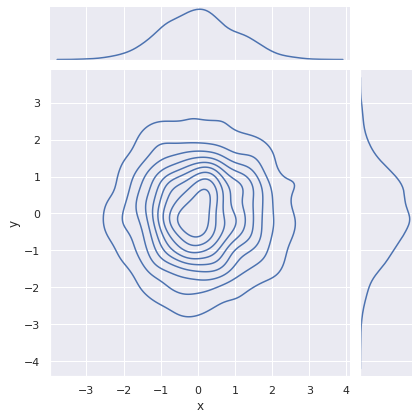

In [87]:
sns.jointplot('x','y',data=df,kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


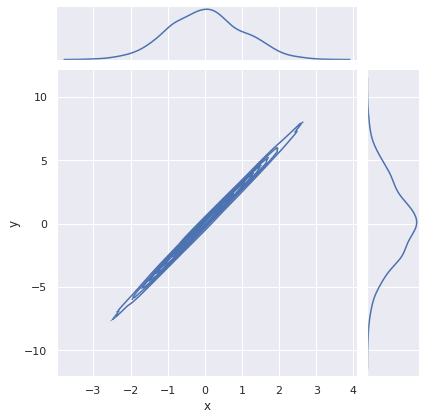

In [88]:
y=3*x+np.random.normal(size=1000)/5
df=pd.DataFrame({'x':x,'y':y})
sns.jointplot('x','y',data=df,kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: ignored

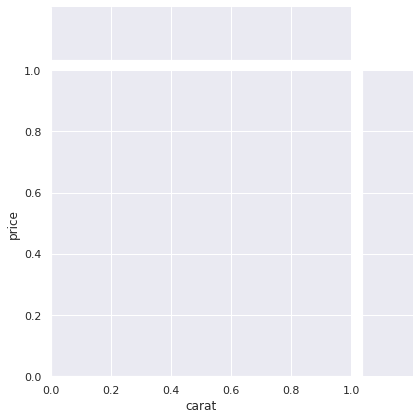

In [89]:
sns.jointplot('carat','price',data=d,kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


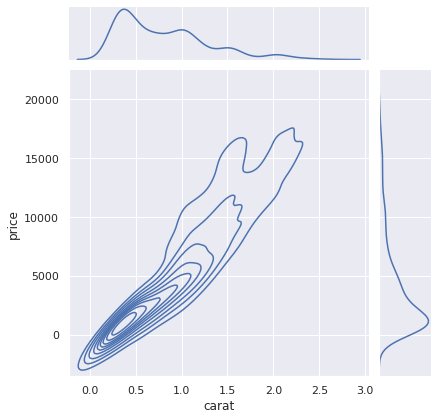

In [90]:
sns.jointplot('carat','price',data=d.sample(1000),kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


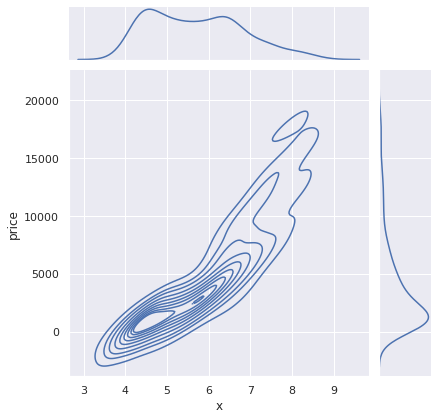

In [91]:
sns.jointplot('x','price',data=d.sample(500),kind='kde');

###swarm plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


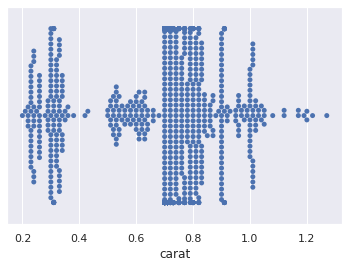

In [92]:
sns.swarmplot(d.head(1000).carat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


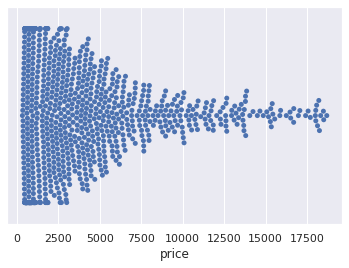

In [93]:
sns.swarmplot(d.sample(1000).price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


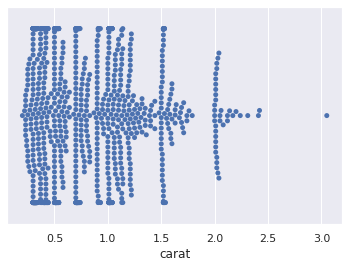

In [94]:
sns.swarmplot(d.sample(1000).carat);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


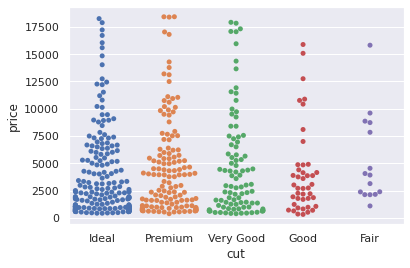

In [95]:
sns.swarmplot(x='cut',y='price',data=d.sample(500));

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; y

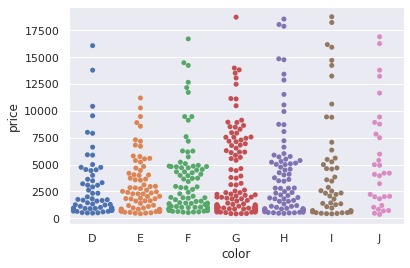

In [96]:
sns.swarmplot(x='color',y='price',data=d.sample(500));

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; y

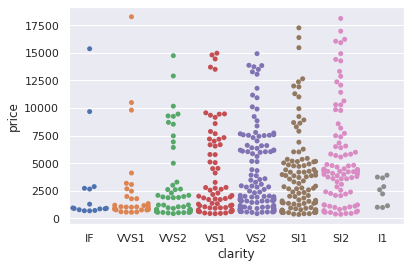

In [97]:
sns.swarmplot(x='clarity',y='price',data=d.sample(500));

In [4]:
p=sns.load_dataset('penguins')

In [99]:
p

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    Male

[344 rows x 7 columns]

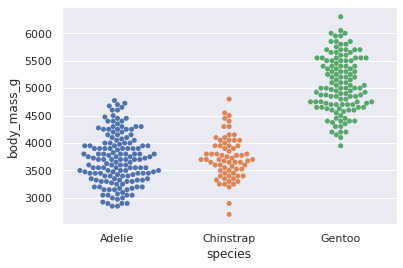

In [102]:
sns.swarmplot(x='species',y='body_mass_g',data=p);

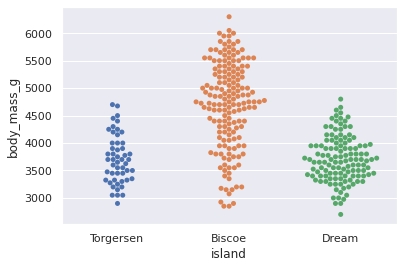

In [103]:
sns.swarmplot(x='island',y='body_mass_g',data=p);

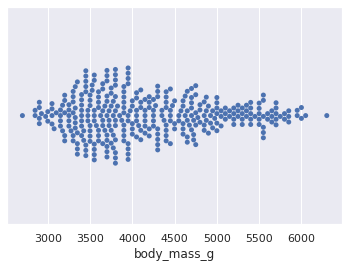

In [104]:
sns.swarmplot(x='body_mass_g',data=p);

###violin plot

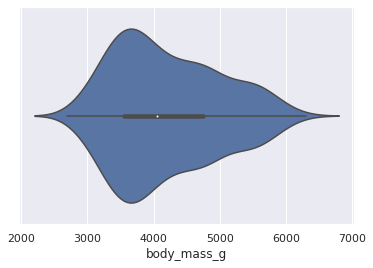

In [105]:
sns.violinplot(x='body_mass_g',data=p);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


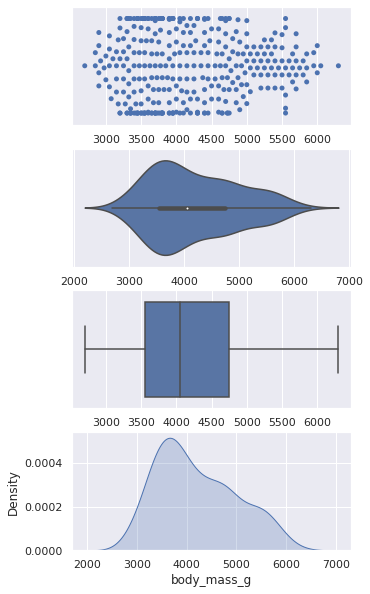

In [106]:
fig,axs=plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
sns.kdeplot(p.body_mass_g,shade=True,ax=axs[3]);
fig.set_size_inches(5,10)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


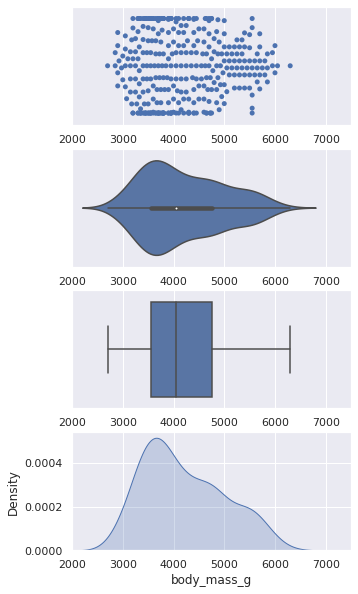

In [107]:
fig,axs=plt.subplots(nrows=4)
p1=sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
p1.set(xlim=(2000,7500))
p2=sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
p2.set(xlim=(2000,7500))
p3=sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
p3.set(xlim=(2000,7500))
p4=sns.kdeplot(p.body_mass_g,shade=True,ax=axs[3]);
p4.set(xlim=(2000,7500))
fig.set_size_inches(5,10)

###multiple violin plot

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


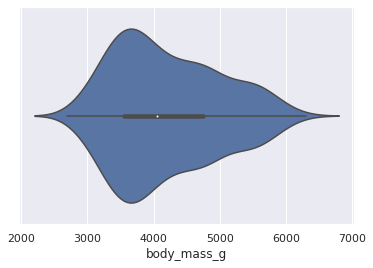

In [108]:
sns.violinplot(x='body_mass_g',data=p,orient='v');

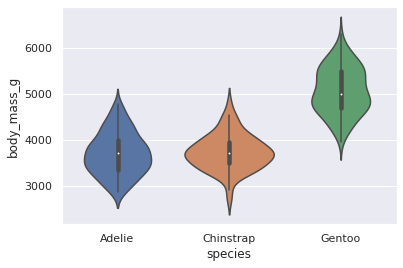

In [109]:
sns.violinplot(x='species',y='body_mass_g',data=p);

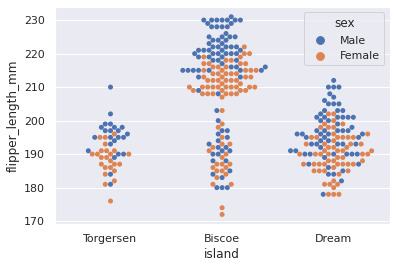

In [110]:
sns.swarmplot(x='island',y='flipper_length_mm',hue='sex',data=p)

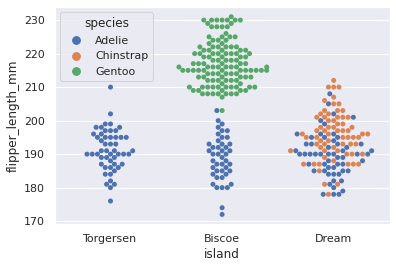

In [111]:
sns.swarmplot(x='island',y='flipper_length_mm',hue='species',data=p)

###paired violin plot

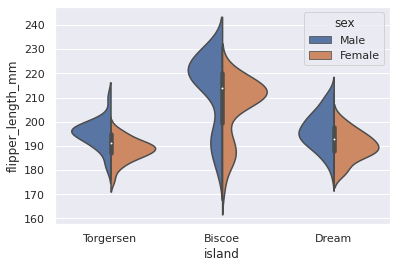

In [112]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',split=True,data=p)

In [116]:
sns.violinplot(x='island',y='flipper_length_mm',data=p[p.sex=='MALE'])

ValueError: ignored

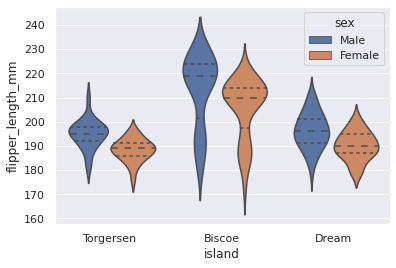

In [117]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',inner='quartile',data=p)

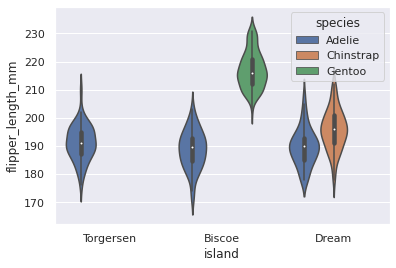

In [118]:
sns.violinplot(x='island',y='flipper_length_mm',hue='species',data=p)

In [119]:
p['binary_species']=p.species.apply(lambda x: 0 if x == 'Gentoo' else 1)

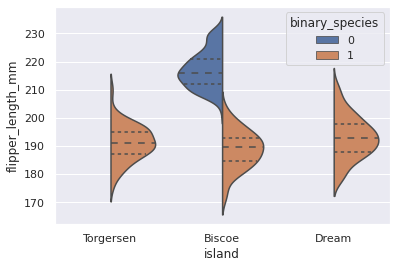

In [120]:
sns.violinplot(x='island',y='flipper_length_mm',hue='binary_species',split=True,inner='quartile',data=p)

###faceted plotting

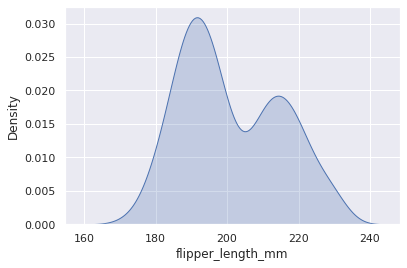

In [121]:
sns.kdeplot(p.flipper_length_mm,shade=True)

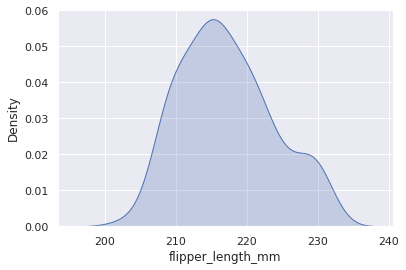

In [122]:
sns.kdeplot(p[p.species=='Gentoo'].flipper_length_mm,shade=True)

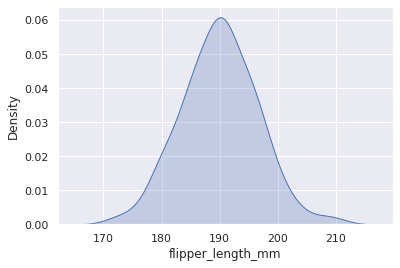

In [123]:
sns.kdeplot(p[p.species=='Adelie'].flipper_length_mm,shade=True)

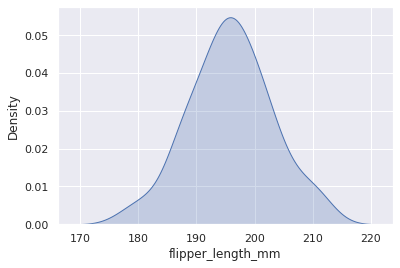

In [124]:
sns.kdeplot(p[p.species=='Chinstrap'].flipper_length_mm,shade=True)

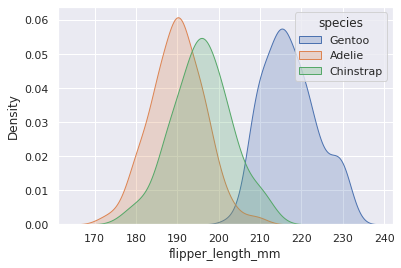

In [125]:
sns.kdeplot(p[p.species=='Gentoo'].flipper_length_mm,shade=True)
sns.kdeplot(p[p.species=='Adelie'].flipper_length_mm,shade=True)
sns.kdeplot(p[p.species=='Chinstrap'].flipper_length_mm,shade=True)
plt.legend(title='species',labels=['Gentoo','Adelie','Chinstrap'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


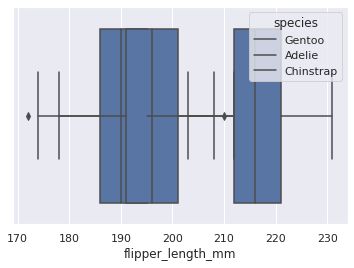

In [126]:
sns.boxplot(p[p.species=='Gentoo'].flipper_length_mm)
sns.boxplot(p[p.species=='Adelie'].flipper_length_mm)
sns.boxplot(p[p.species=='Chinstrap'].flipper_length_mm)
plt.legend(title='species',labels=['Gentoo','Adelie','Chinstrap'])

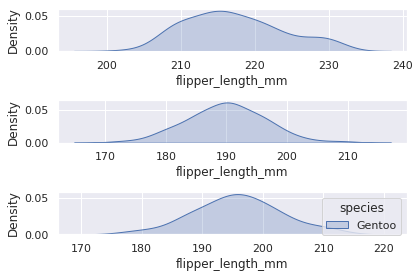

In [130]:
fig,axs=plt.subplots(3);
sns.kdeplot(p[p.species=='Gentoo'].flipper_length_mm,shade=True,ax=axs[0])
sns.kdeplot(p[p.species=='Adelie'].flipper_length_mm,shade=True,ax=axs[1])
sns.kdeplot(p[p.species=='Chinstrap'].flipper_length_mm,shade=True,ax=axs[2])
plt.tight_layout()
plt.legend(title='species',labels=['Gentoo','Adelie','Chinstrap'])

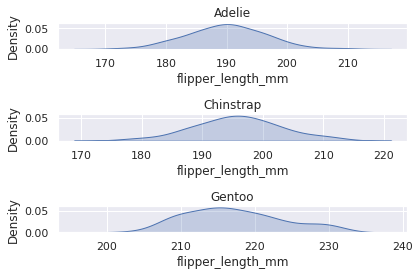

In [132]:
column_name='species'
nrows=len(p[column_name].unique())
fig,axs=plt.subplots(nrows)
i=0
for v in p[column_name].unique():
    p1=sns.kdeplot(p[p[column_name]==v].flipper_length_mm,shade=True,ax=axs[i]);
    p1.set_title(v);
    i+=1
    plt.tight_layout()

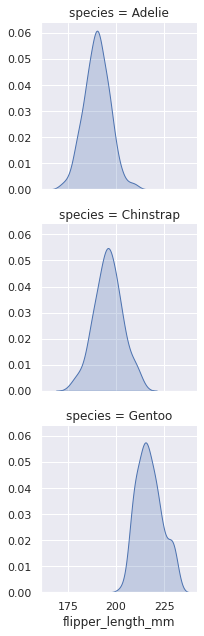

In [133]:
g=sns.FacetGrid(p,row='species');
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

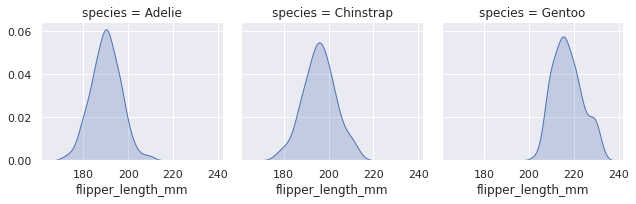

In [134]:
g=sns.FacetGrid(p,col='species');
g.map(sns.kdeplot,'flipper_length_mm',shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

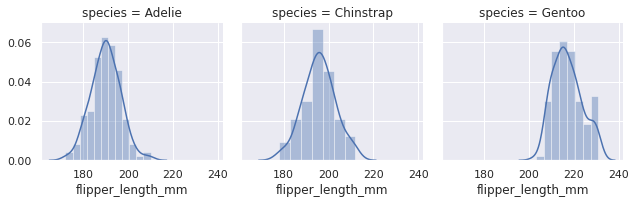

In [136]:
g=sns.FacetGrid(p,col='species');
g.map(sns.distplot,'flipper_length_mm')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


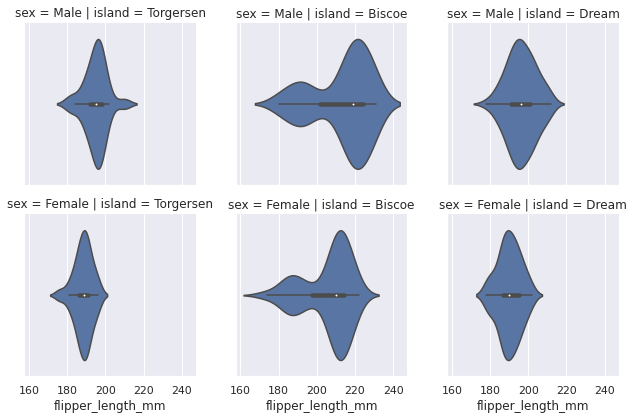

In [137]:
g=sns.FacetGrid(p,row='sex',col='island');
g.map(sns.violinplot,'flipper_length_mm')

###pair plot

In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


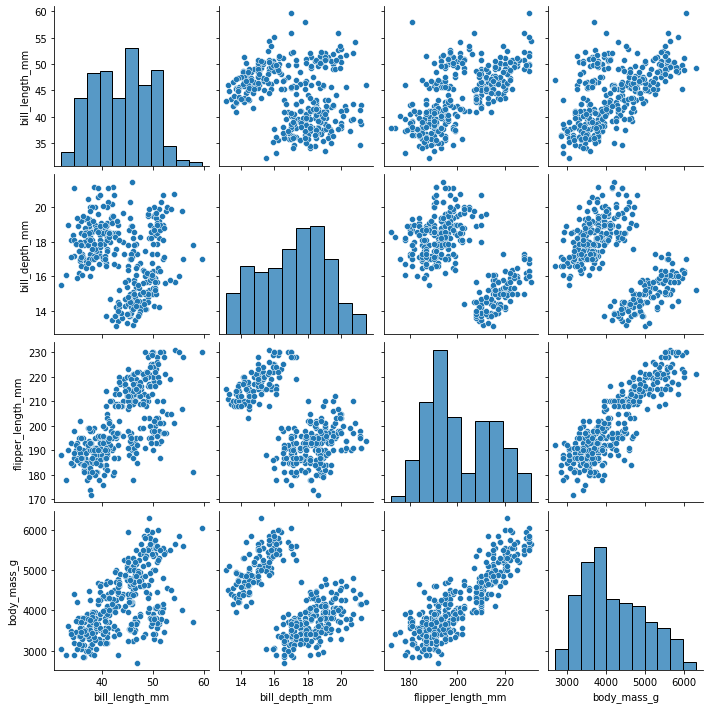

In [6]:
sns.pairplot(p);

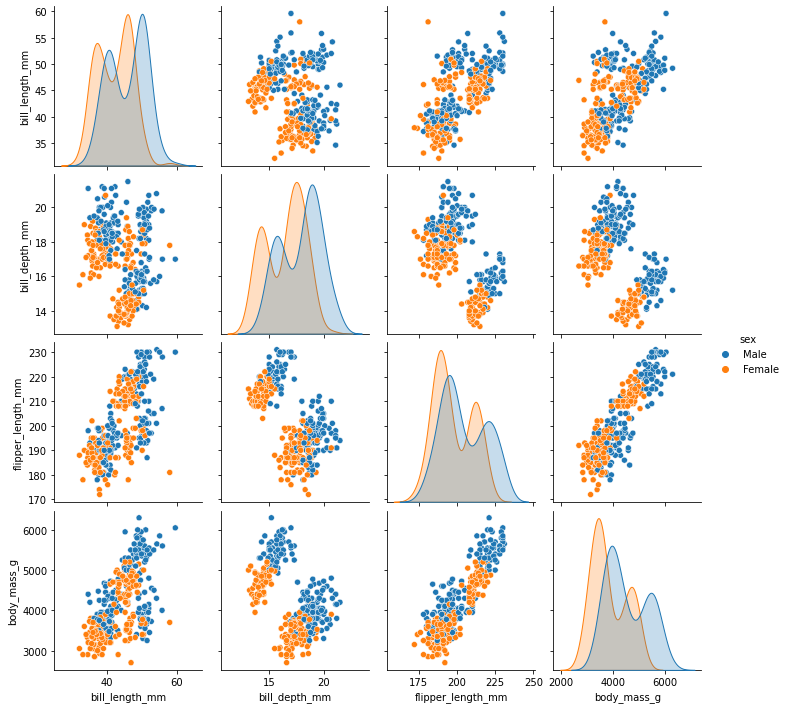

In [7]:
sns.pairplot(p,hue='sex')

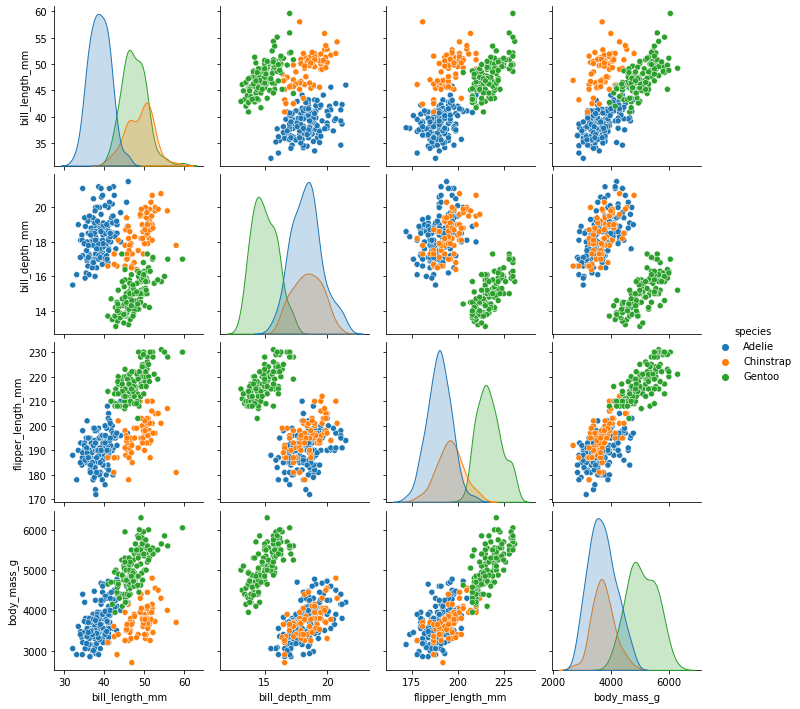

In [8]:
sns.pairplot(p,hue='species')

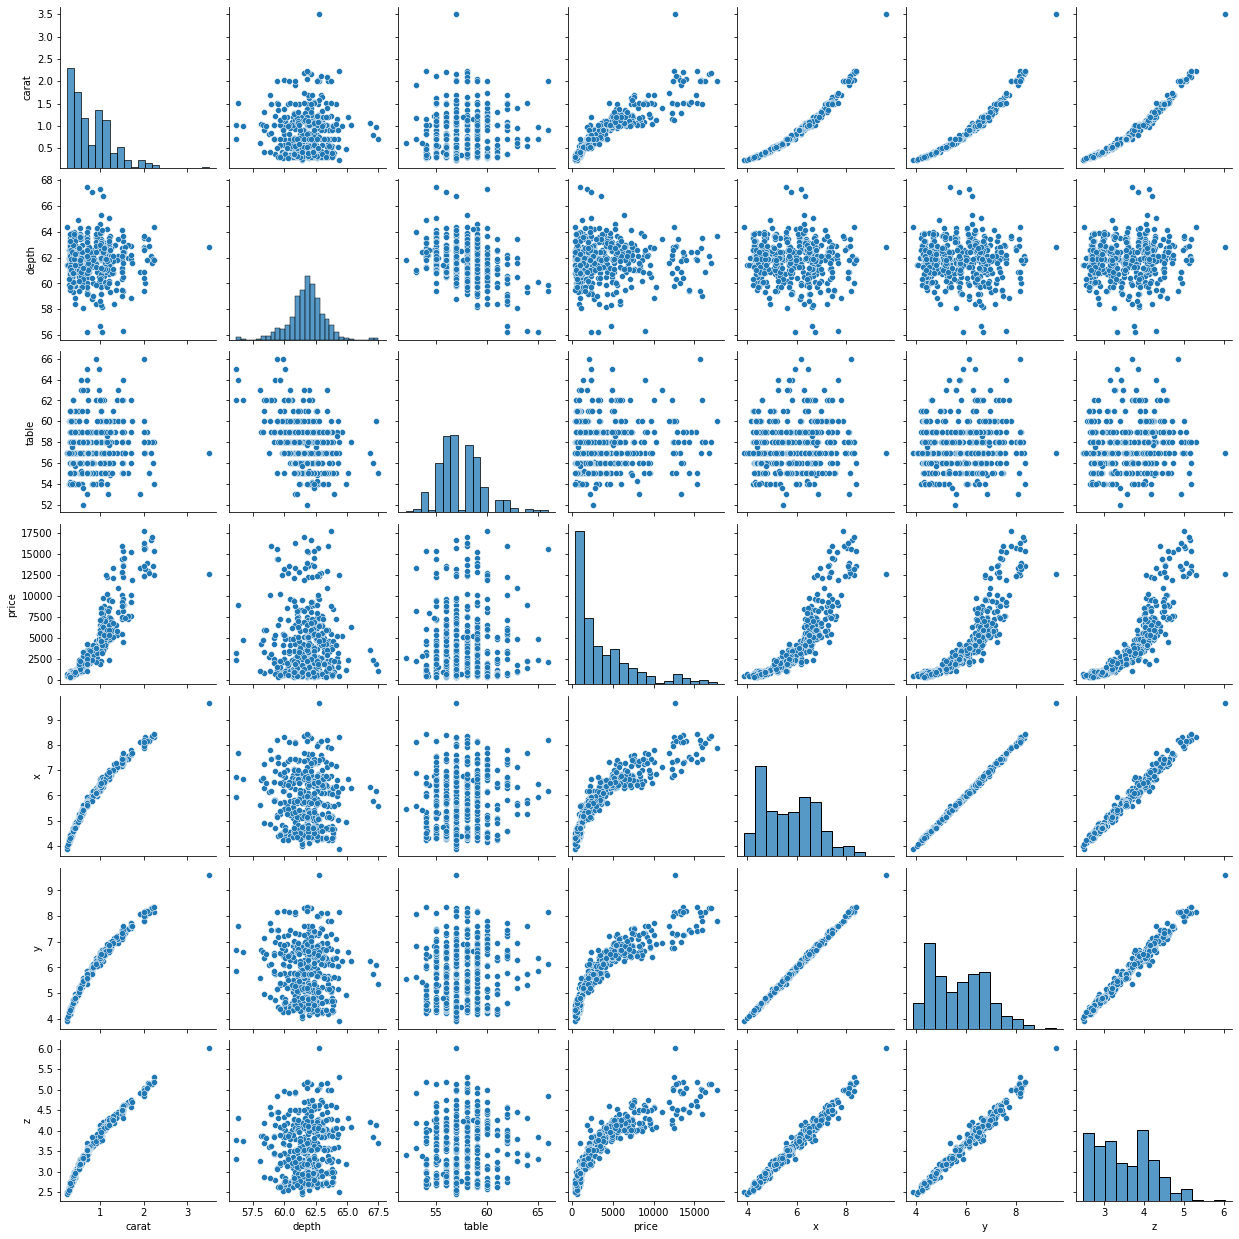

In [9]:
sns.pairplot(d.sample(500))

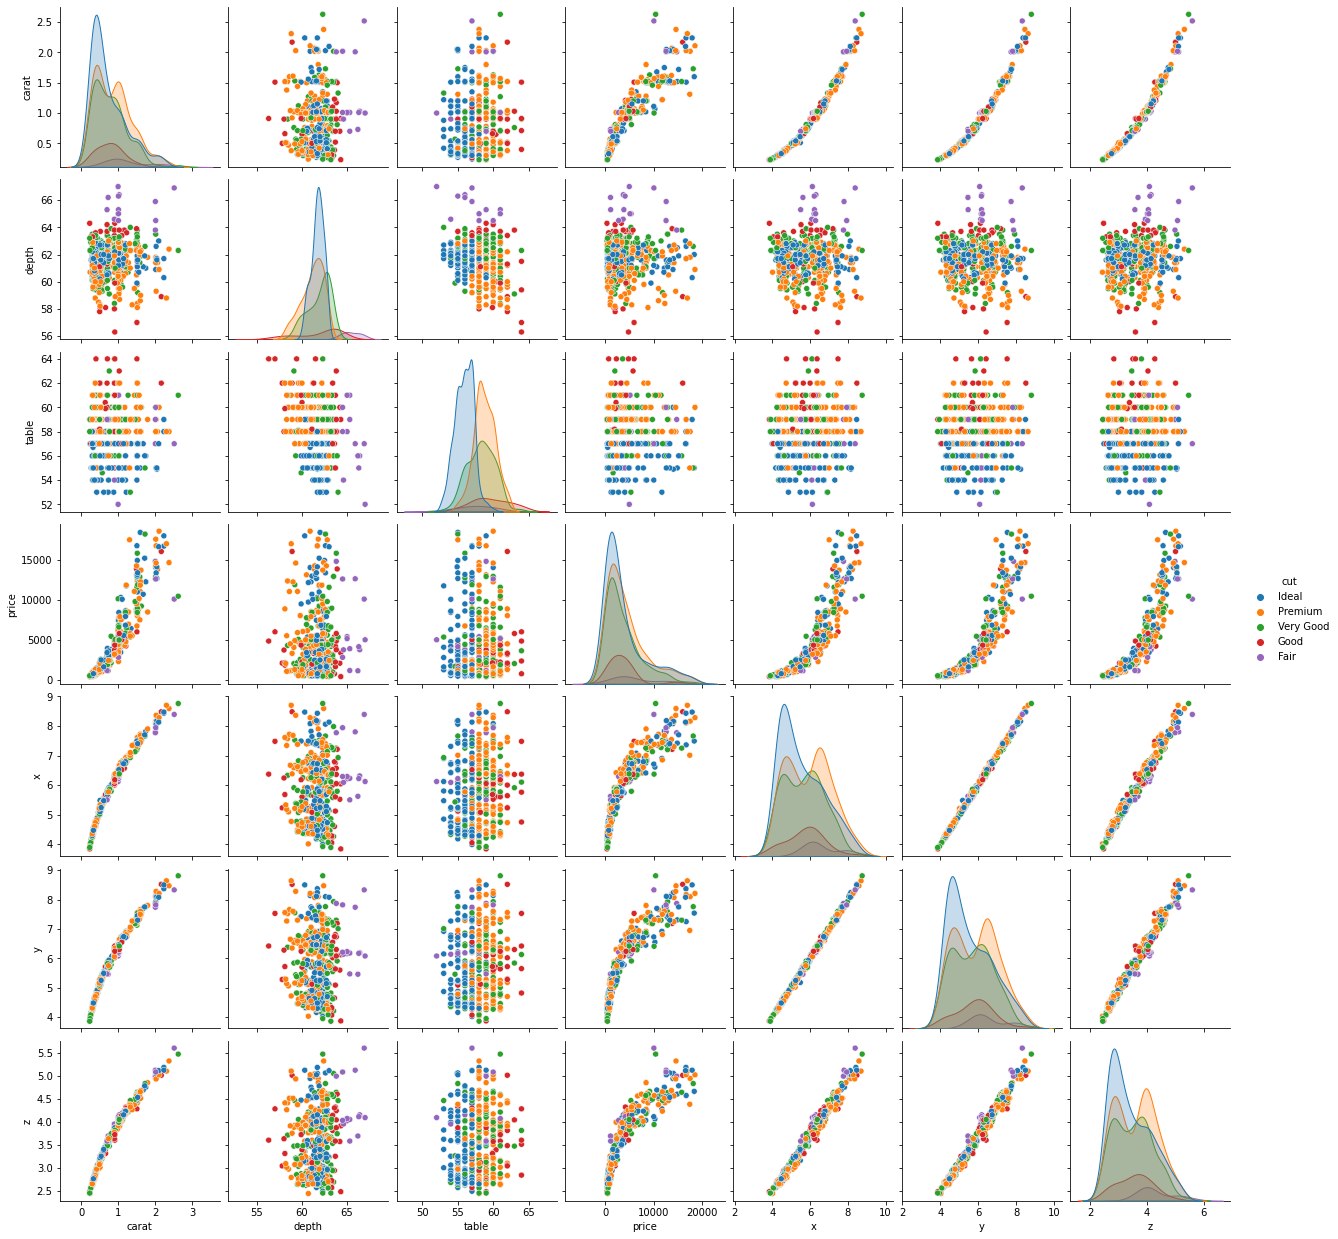

In [10]:
sns.pairplot(d.sample(500),hue='cut')

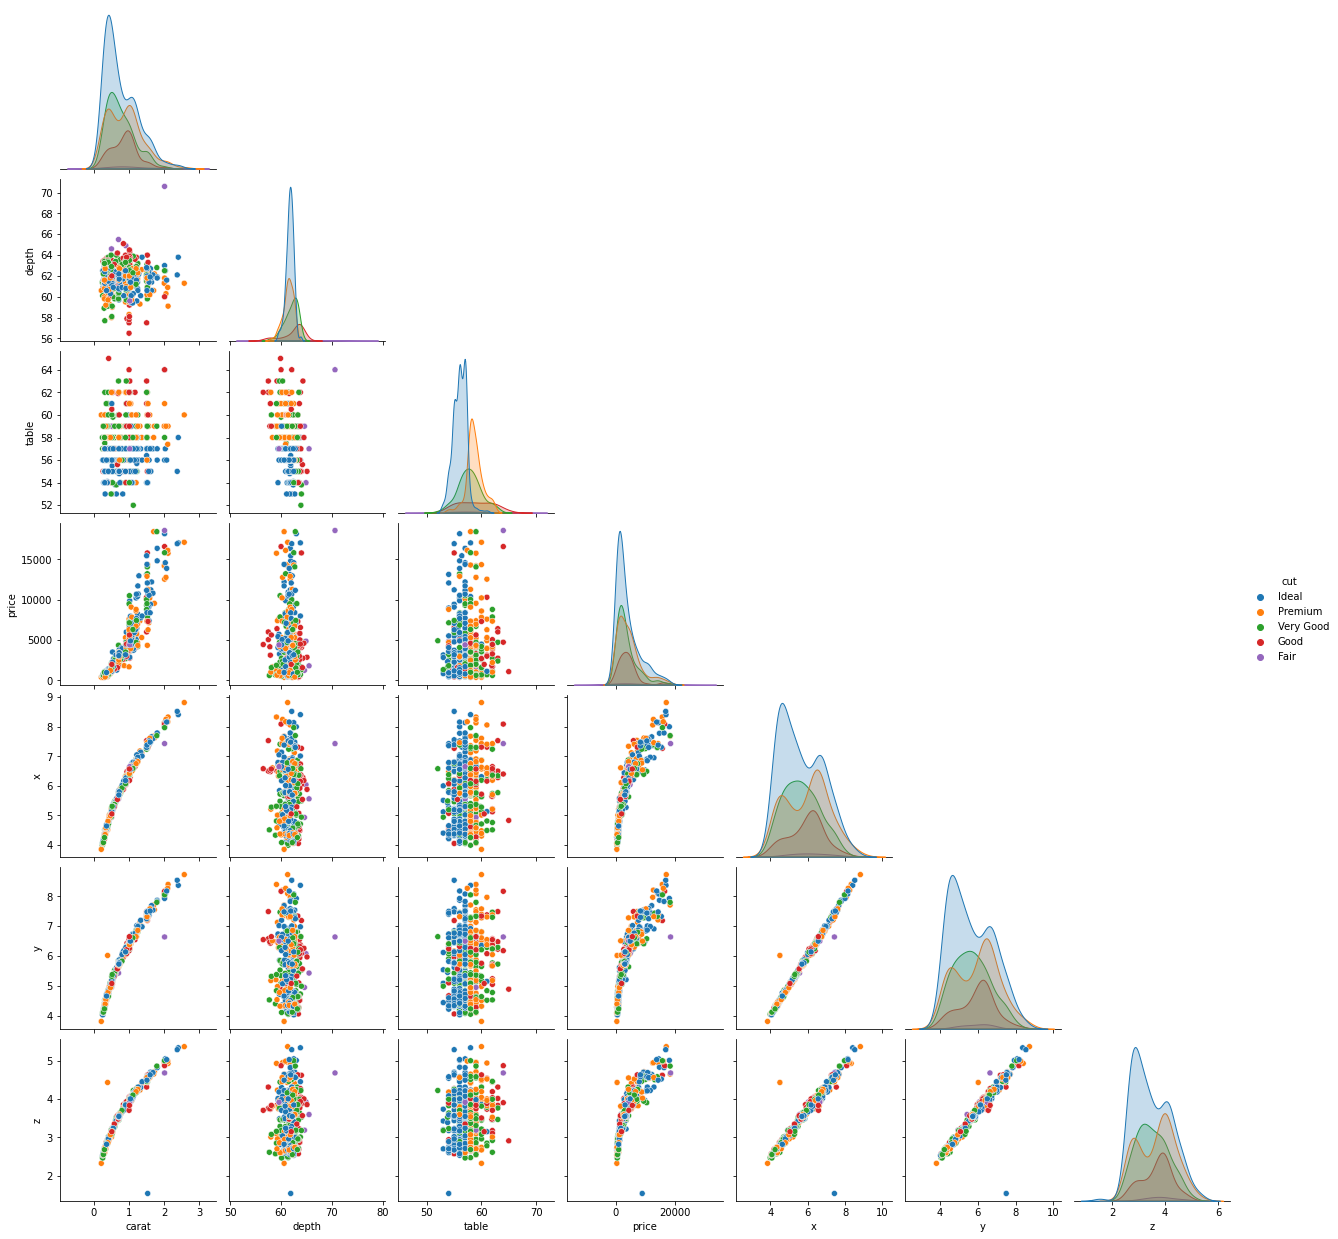

In [11]:
sns.pairplot(d.sample(500),hue='cut',corner=True)